In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [3]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

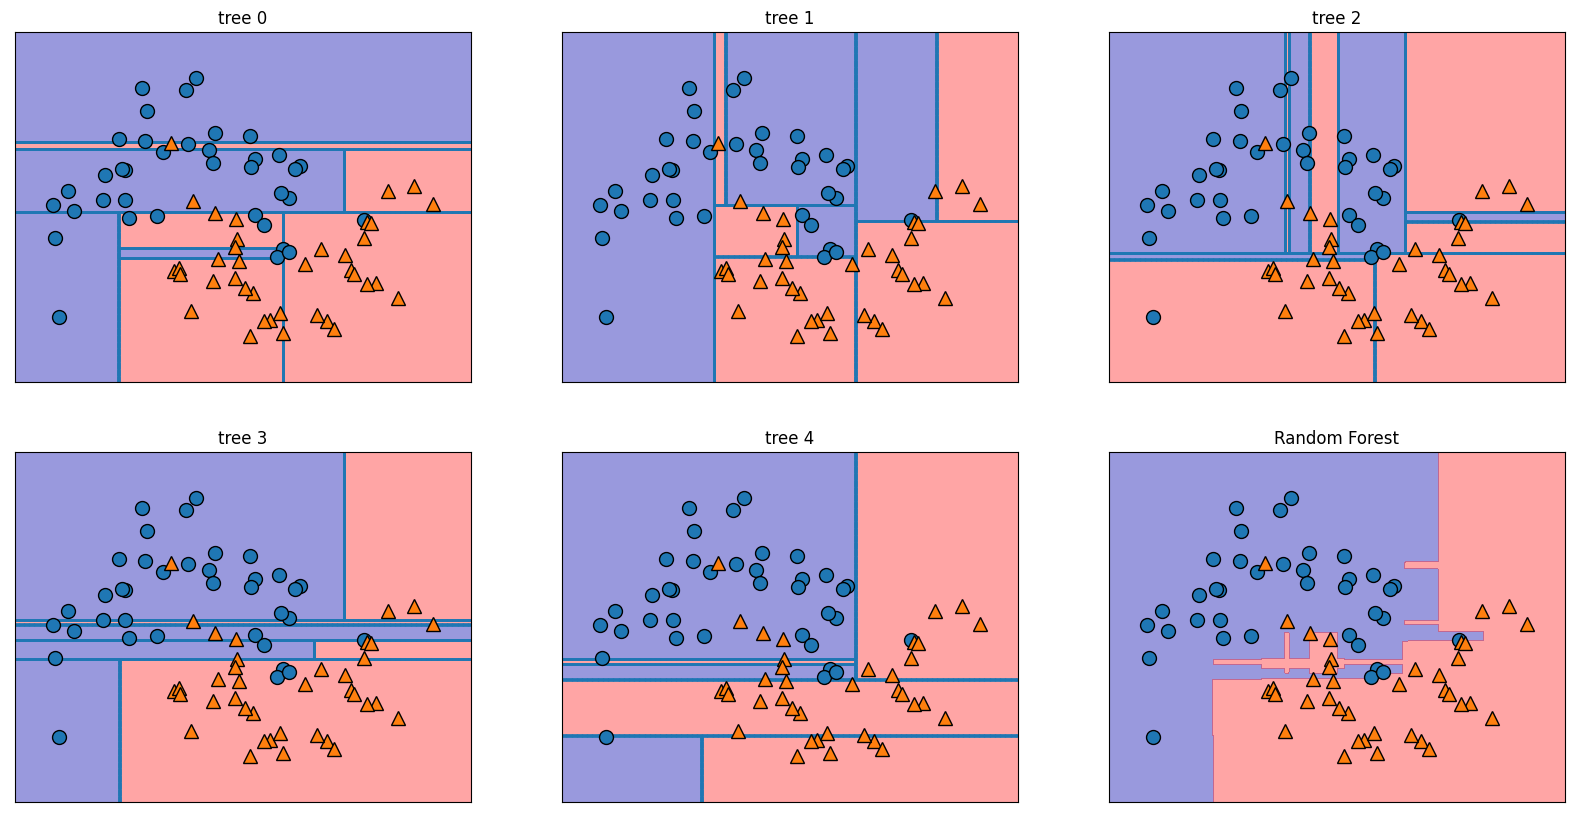

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


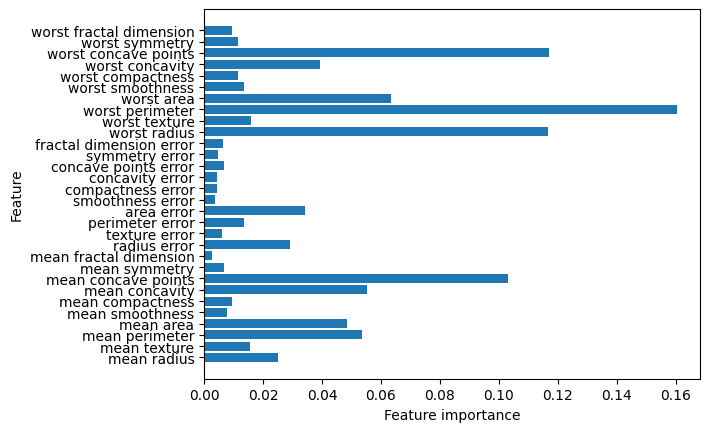

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(forest)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [9]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


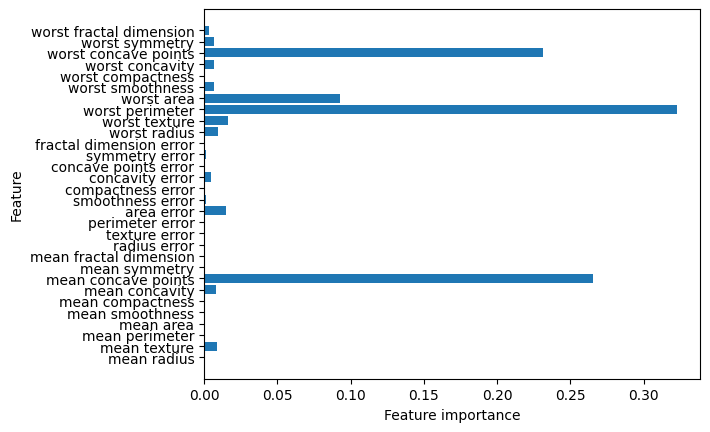

In [10]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./train_modified/train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'
train['Disbursed'].value_counts()

0    19680
1      320
Name: Disbursed, dtype: int64

可以看到类别输出如下，也就是类别0的占大多数。

In [4]:
x_columns = [x for x in train.columns if x not in [target, IDcol]]
X = train[x_columns]
y = train['Disbursed']

In [5]:
# 不管任何参数，都用默认的，我们拟合下数据看看
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X, y)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(X)[:, 1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

0.98315
AUC Score (Train): 0.999994


首先对n_estimators进行网格搜索

In [6]:
param_test1 = {'n_estimators': range(10, 71, 10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(
                                                         min_samples_split=100, min_samples_leaf=20, 
                                                         max_depth=8, max_features='sqrt', random_state=10), 
                                                         param_grid=param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(X, y)
result= pd.DataFrame(gsearch1.cv_results_)
print(result)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print(gsearch1.best_estimator_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.058280      0.002601         0.006981        0.000631   
1       0.101063      0.004293         0.010091        0.001312   
2       0.147564      0.003291         0.013066        0.000202   
3       0.198484      0.002233         0.015723        0.000387   
4       0.244456      0.008870         0.018912        0.000524   
5       0.301423      0.008375         0.021651        0.000790   
6       0.342727      0.008026         0.025581        0.000801   

  param_n_estimators                params  split0_test_score  \
0                 10  {'n_estimators': 10}           0.817974   
1                 20  {'n_estimators': 20}           0.826736   
2                 30  {'n_estimators': 30}           0.837093   
3                 40  {'n_estimators': 40}           0.836763   
4                 50  {'n_estimators': 50}           0.835175   
5                 60  {'n_estimators': 60}           0.836438   
6       

接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索

In [7]:
param_test2 = {'max_depth': range(3, 14, 2), 'min_samples_split': range(50, 201, 20)}
gsearch2 = GridSearchCV(
                        estimator=RandomForestClassifier(n_estimators=60, min_samples_leaf=20, max_features='sqrt', oob_score=True, random_state=10), 
                        param_grid=param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X, y)
result = pd.DataFrame(gsearch2.cv_results_)
result.to_excel('H:/Markdown/learing-note/2022/Python机器学习基础/Charpter02/randomforest.xlsx', encoding='utf-8')
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_depth': 13, 'min_samples_split': 110}
0.8242016800050813


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [8]:
# 我们看看我们现在模型的袋外分数
rf1 = RandomForestClassifier(
                              n_estimators=60, max_depth=13, 
                              min_samples_split=110, min_samples_leaf=20, 
                              max_features='sqrt', oob_score=True,
                              random_state=10)
rf1.fit(X, y)
print(rf1.oob_score_)

0.984


对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。

In [10]:
param_test3 = {'min_samples_split': range(80, 150, 20), 'min_samples_leaf': range(10, 60, 10)} 
gsearch3 = GridSearchCV(estimator=RandomForestClassifier(
                                                         n_estimators=60, max_depth=13, 
                                                         max_features='sqrt', oob_score=True, 
                                                         random_state=10),
                         param_grid=param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X, y)
result = pd.DataFrame(gsearch3.cv_results_)
result.to_excel("H:/Markdown/learing-note/2022/Python机器学习基础/Charpter02/result_test3.xlsx", encoding='utf-8')

print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'min_samples_leaf': 20, 'min_samples_split': 120}
0.8248650279471545


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


最后我们再对最大特征数max_features做调参

In [12]:
param_test4 = {'max_features': range(3, 11, 2)}
gsearch4 = GridSearchCV(estimator=RandomForestClassifier(
                                                         n_estimators=60, max_depth=13, 
                                                         min_samples_split=120, min_samples_leaf=20,
                                                         oob_score=True, random_state=10),
                            param_grid=param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X, y)
result = pd.DataFrame(gsearch4.cv_results_)
result.to_excel("H:/Markdown/learing-note/2022/Python机器学习基础/Charpter02/result_test4.xlsx", encoding='utf-8')

print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'max_features': 7}
0.8248650279471545


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


用我们搜索到的最佳参数，我们再看看最终的模型拟合：

In [13]:
rf2 = RandomForestClassifier(n_estimators=60, max_depth=13, 
                             min_samples_split=120, min_samples_leaf=20,
                             oob_score=True, random_state=10)

rf2.fit(X, y)
print(rf2.oob_score_)

0.984


可见此时模型的袋外分数基本没有提高，主要原因是0.984已经是一个很高的袋外分数了，如果想进一步需要提高模型的泛化能力，我们需要更多的数据。